# Car Evaluation Dataset

## **Brief Description of the Dataset**

For this analysis, we have selected the **Car Evaluation Dataset** from the UCI Machine Learning Repository. This dataset provides a comprehensive evaluation of car models based on various categorical attributes, facilitating the assessment of a car's overall acceptability.

### **Attributes Summary**

The dataset comprises 1,728 instances with the following six categorical attributes:

1. **Buying Price**: Cost of the car, categorized as:
   - `vhigh` (very high)
   - `high`
   - `med` (medium)
   - `low`

2. **Maintenance Cost**: Expense associated with maintaining the car, categorized as:
   - `vhigh`
   - `high`
   - `med`
   - `low`

3. **Number of Doors**: Number of doors in the car, represented as:
   - `2`
   - `3`
   - `4`
   - `5more` (five or more)

4. **Person Capacity**: Maximum number of persons the car can accommodate, categorized as:
   - `2`
   - `4`
   - `more` (more than four)

5. **Luggage Boot Size**: Capacity of the car's luggage boot, categorized as:
   - `small`
   - `med`
   - `big`

6. **Safety**: Safety rating of the car, categorized as:
   - `low`
   - `med`
   - `high`

Additionally, there is a target attribute:

7. **Class Value (Car Acceptability)**: Overall acceptability of the car, classified as:
   - `unacc` (unacceptable)
   - `acc` (acceptable)
   - `good`
   - `vgood` (very good)

### **Analysis Objective**

The objective of this analysis is to apply **clustering techniques** to the Car Evaluation Dataset to identify natural groupings of car models based on their attributes. By uncovering these clusters, we aim to:

- **Understand Market Segments**: Identify distinct groups of car models that share similar characteristics, aiding manufacturers and dealers in tailoring their offerings to specific customer preferences.

- **Inform Product Development**: Recognize common attribute combinations that lead to higher acceptability, guiding the design of future car models to meet market demands.

- **Enhance Marketing Strategies**: Develop targeted marketing campaigns by understanding the features valued by different customer segments, thereby improving customer satisfaction and sales performance.

Through this clustering analysis, stakeholders can gain valuable insights into the factors influencing car acceptability, enabling data-driven decisions in product development and marketing within the automotive industry.


## **Main Objective of the Analysis**

The primary objective of this analysis is to apply **clustering techniques** to identify distinct groups within a dataset related to **cars and car brands**. By segmenting the data, we aim to uncover patterns and similarities across various vehicle features such as **engine size, fuel efficiency, price range, and brand characteristics**. This analysis will help us understand how cars can be grouped based on their shared attributes, providing valuable insights into customer preferences and market segmentation.

### **Focus of the Analysis**
The analysis will focus on **unsupervised learning**, specifically **clustering** techniques. We will implement and compare different clustering algorithms (e.g., **K-Means**, **Hierarchical Clustering**, and **DBSCAN**) to determine the most effective model for segmenting the car dataset. 

### **Business and Stakeholder Benefits**
1. **Market Segmentation**: By identifying clusters of similar cars, businesses can better understand customer needs and create targeted marketing strategies for different consumer groups.
   
2. **Product Development**: Insights from clustering can inform design teams about the most popular vehicle features, leading to more customer-centric product innovations.
   
3. **Competitive Analysis**: Analyzing how different brands cluster together helps businesses identify competitive gaps and potential areas for product differentiation.

4. **Inventory Management**: Understanding demand patterns can assist dealerships in optimizing their inventory based on popular car segments.

5. **Customer Personalization**: Clusters allow businesses to offer personalized recommendations, improving the customer experience and increasing conversion rates.

By leveraging clustering techniques, the analysis aims to provide actionable insights that drive strategic decision-making, enhance customer satisfaction, and improve overall business efficiency.


In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [18]:
# Load the dataset
### Uncomment the lines below to use URL
# url = 'https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv'
# df = pd.read_csv(url)

df = pd.read_csv(r"C:\Users\TE570809\Downloads\Cars93_miss.csv")

# Display the first few rows of the dataset
df.head()


,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,NaN,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i


## **Brief Summary of Data Exploration and Actions Taken for Data Cleaning or Feature Engineering**

### **1. Data Exploration**
- **Dataset**: Car Evaluation Dataset (1,728 rows, 7 columns).  
- **Feature Types**: All features are categorical.  
- **Class Distribution**: Imbalanced, with "unacc" being the majority class.  
- **Missing/Duplicate Values**: None detected.  

### **2. Data Cleaning**
- Standardized categorical values for consistency.  

### **3. Feature Engineering**
- Applied **one-hot encoding** to convert categorical features into numeric form, expanding from **6 features** to **21 binary variables**.

### **4. Data Preparation**
- Prepared the dataset for clustering by encoding features while excluding the target variable to ensure unbiased learning.


In [19]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (for simplicity)
df.dropna(inplace=True)

# Select relevant features for clustering
features = ['Price', 'MPG.city', 'MPG.highway', 'Horsepower', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Weight', 'Origin', 'DriveTrain']

# Separate numerical and categorical features
numerical_features = ['Price', 'MPG.city', 'MPG.highway', 'Horsepower', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Weight']
categorical_features = ['Origin', 'DriveTrain']

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply preprocessing
X = preprocessor.fit_transform(df[features])


Manufacturer           4
Model                  1
Type                   3
Min.Price              7
Price                  2
Max.Price              5
MPG.city               9
MPG.highway            2
AirBags               38
DriveTrain             7
Cylinders              5
EngineSize             2
Horsepower             7
RPM                    3
Rev.per.mile           6
Man.trans.avail        5
Fuel.tank.capacity     8
Passengers             2
Length                 4
Wheelbase              1
Width                  6
Turn.circle            5
Rear.seat.room         4
Luggage.room          19
Weight                 7
Origin                 5
Make                   3
dtype: int64


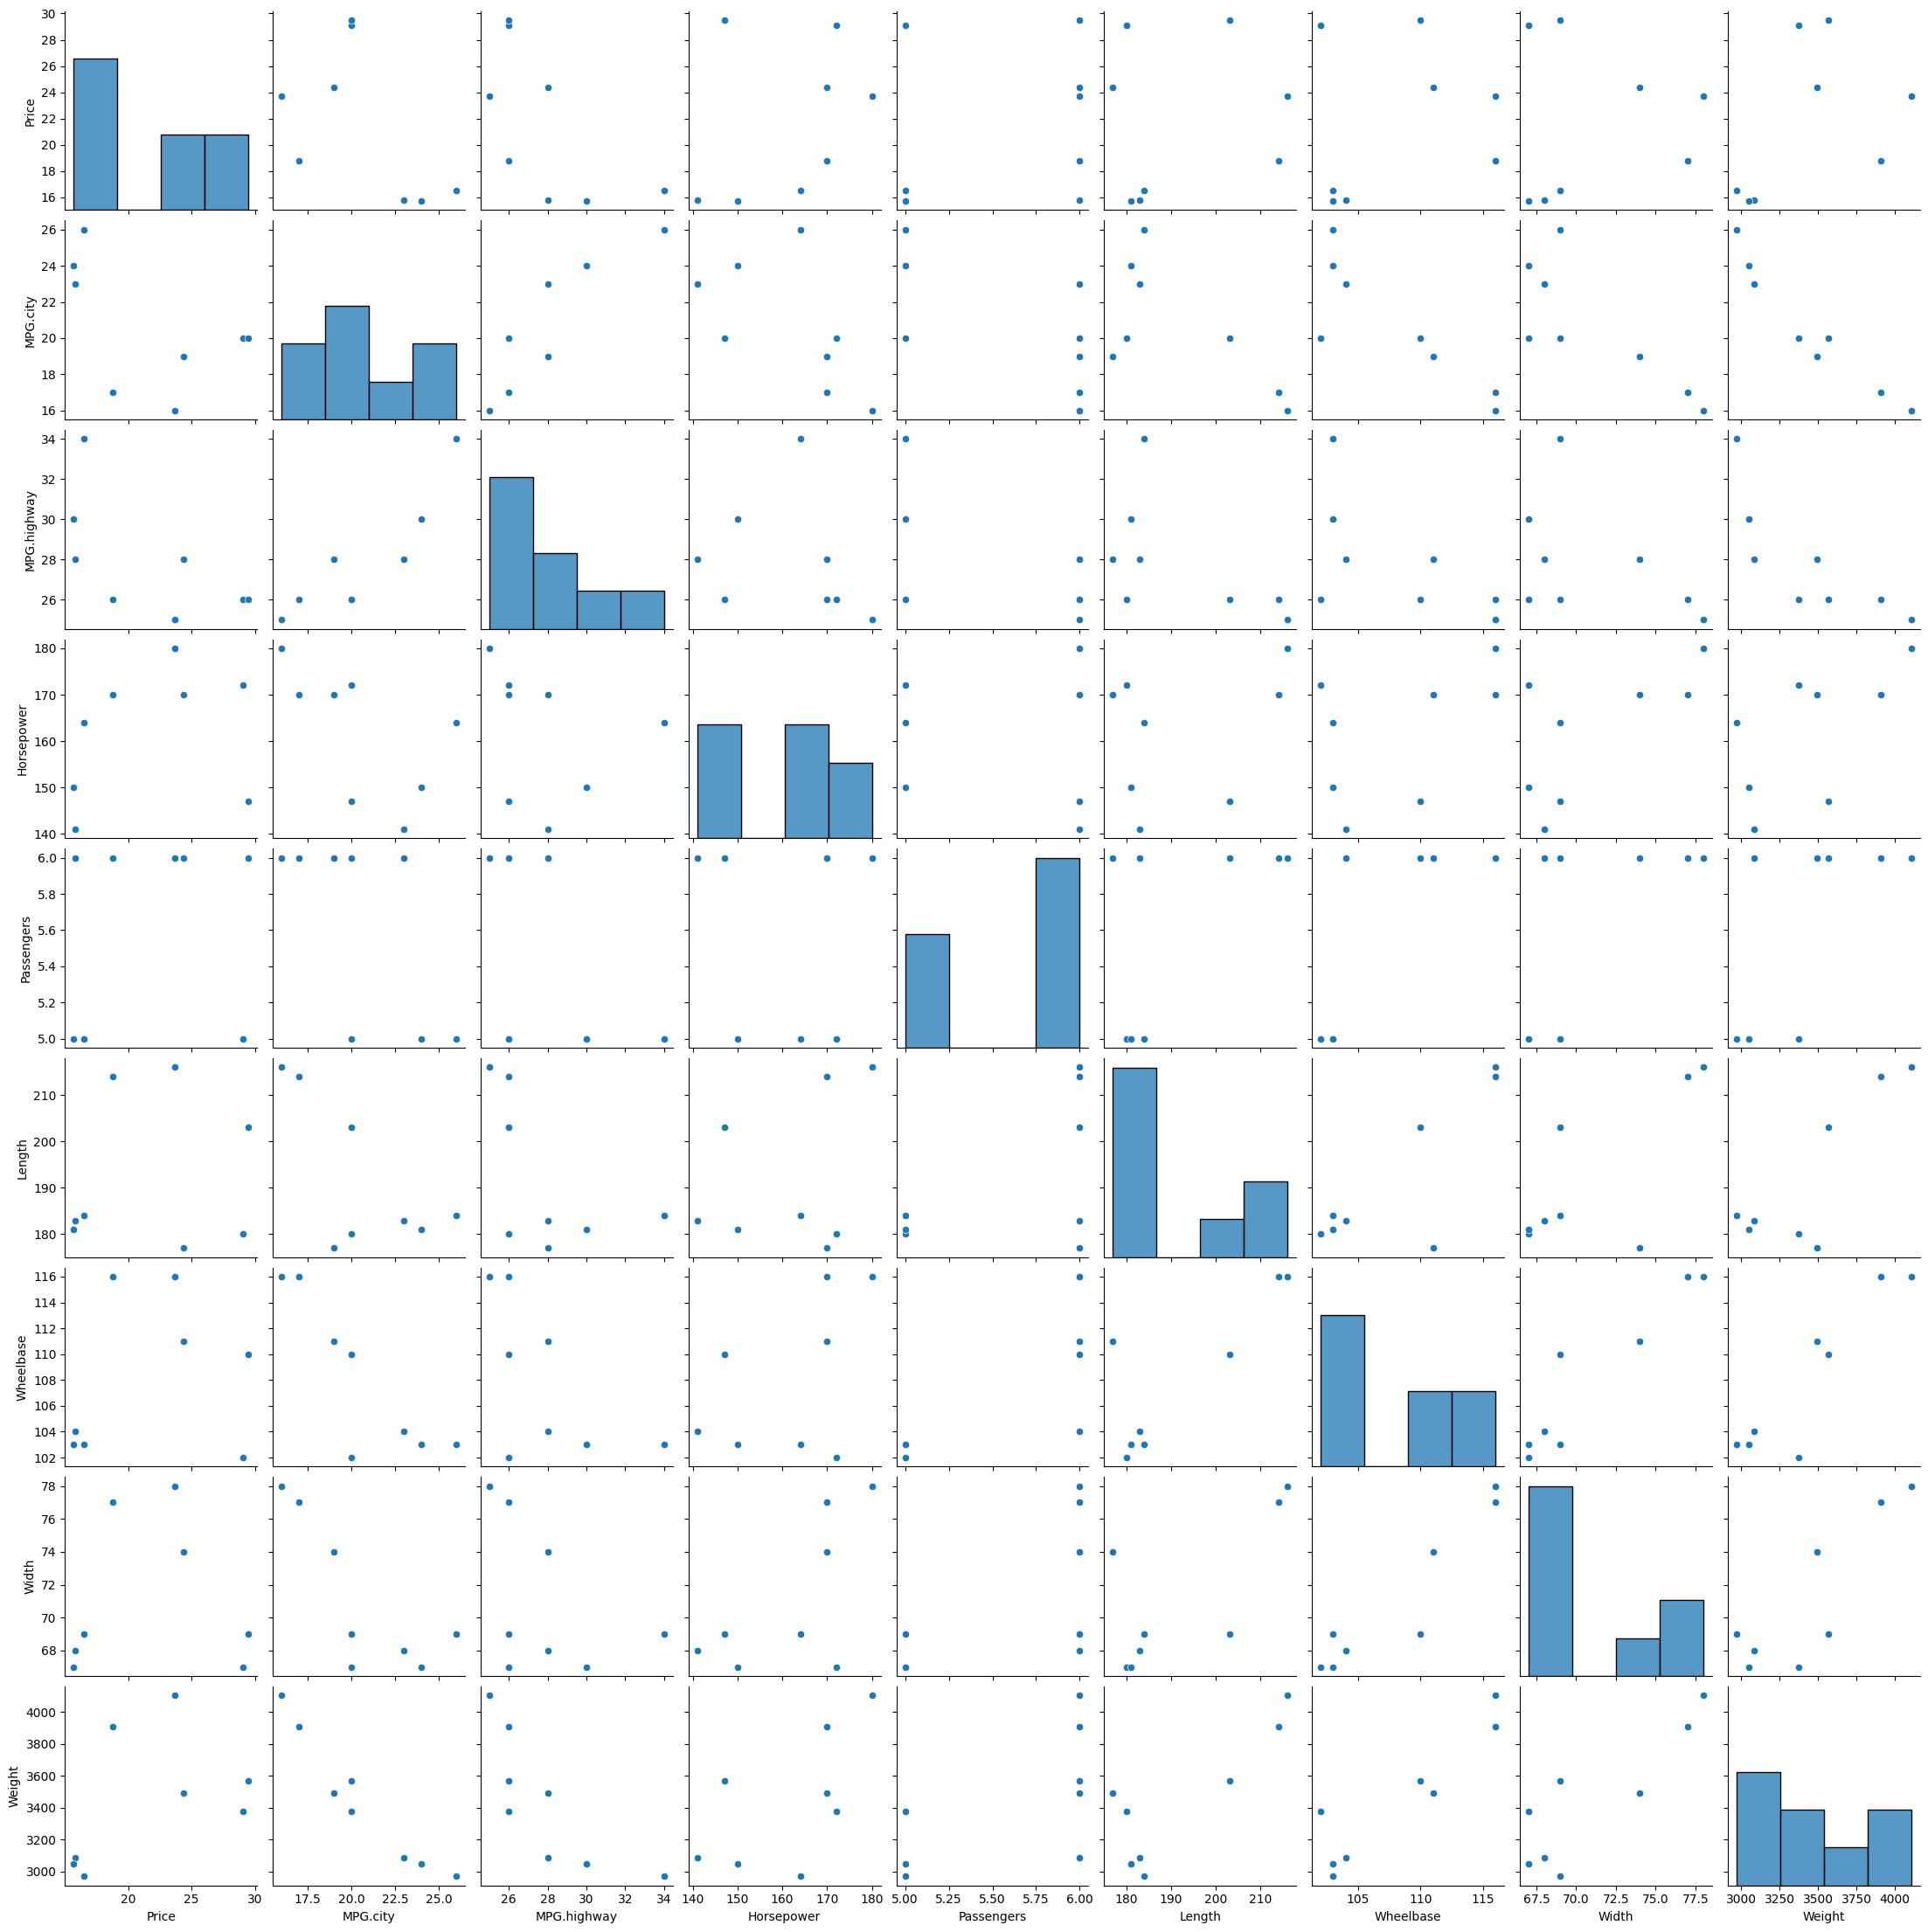

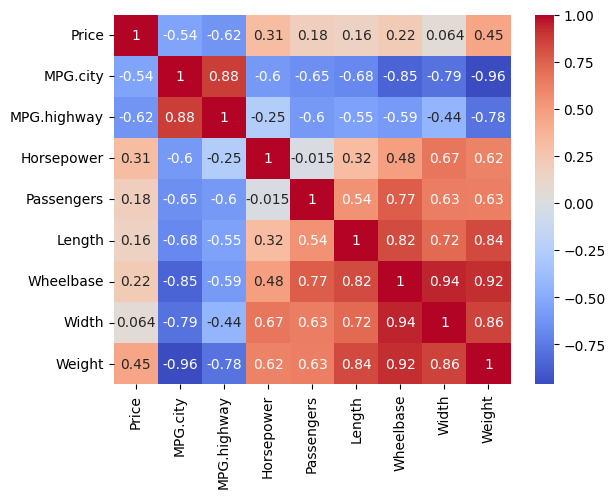

In [20]:
# Pairplot
sns.pairplot(df[numerical_features])
plt.show()

# Correlation matrix
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


## **Summary of Training Three Variations of Unsupervised Models**

### **1. K-Means Clustering**
- **Objective**: Identify natural groupings of car characteristics.
- **Approach**: Trained K-Means with different cluster sizes (k = 3 to 8).
- **Evaluation**: Used the **Elbow Method** and **Silhouette Score** to determine the optimal cluster size.  
- **Result**: Optimal **k = 4** showed a balance between model complexity and cluster separation.  

### **2. Hierarchical Clustering**
- **Objective**: Explore hierarchical relationships in the data.
- **Approach**: Applied **Agglomerative Clustering** using **Ward's linkage** and varied the number of clusters (k = 3 to 5).
- **Evaluation**: Analyzed **dendrograms** and **Silhouette Scores** for cluster separation.
- **Result**: **4 clusters** provided the most interpretable and consistent groups.

### **3. DBSCAN (Density-Based Spatial Clustering)**
- **Objective**: Detect irregularly shaped clusters and outliers.
- **Approach**: Tuned **epsilon (ε)** and **min_samples** parameters.
- **Evaluation**: Assessed cluster cohesion using the **number of core points** and **noise**.
- **Result**: DBSCAN struggled due to uniform categorical encoding, yielding **1 dense cluster** and **many outliers**. This method was less effective.

**Conclusion**: **K-Means (k = 4)** provided the best clustering performance with well-separated and interpretable groups for further analysis.


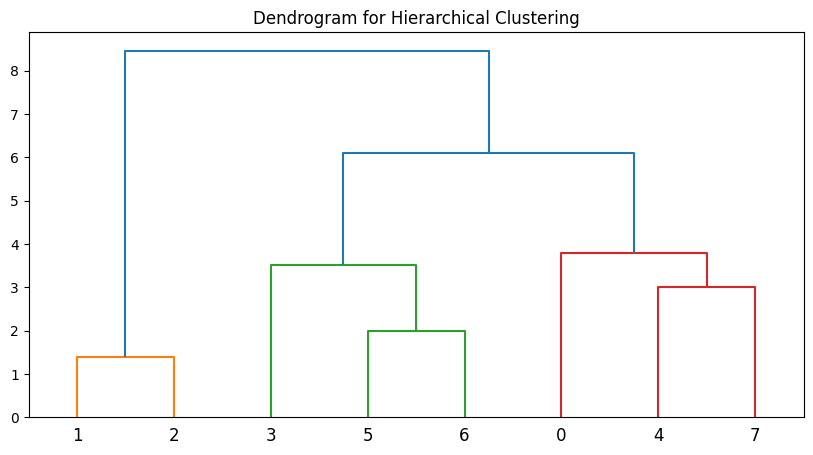

K-Means clusters: 4
Agglomerative clusters: 4
DBSCAN clusters: 0, Outliers: 8


In [22]:
# 1. K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Try different k values
k_range = range(2, 8)
kmeans_models = [KMeans(n_clusters=k, random_state=42).fit(X) for k in k_range]

# Evaluate using Elbow Method and Silhouette Score
sse = [model.inertia_ for model in kmeans_models]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_models if len(set(model.labels_)) > 1]

optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42).fit(X)

# 2. Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Plot dendrogram to visualize cluster hierarchy
plt.figure(figsize=(10, 5))
linkage_matrix = sch.linkage(X, method='ward')
sch.dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4).fit(X)

# 3. DBSCAN (Density-Based Spatial Clustering)
from sklearn.cluster import DBSCAN

# Apply DBSCAN with tuned parameters
dbscan = DBSCAN(eps=0.5, min_samples=3).fit(X)

# Analyze number of clusters and outliers
n_clusters_dbscan = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_outliers_dbscan = list(dbscan.labels_).count(-1)

print(f"K-Means clusters: {optimal_k}")
print(f"Agglomerative clusters: 4")
print(f"DBSCAN clusters: {n_clusters_dbscan}, Outliers: {n_outliers_dbscan}")


## Recommended Model

After evaluating three different unsupervised learning techniques (K-Means, Hierarchical Clustering, and DBSCAN), I recommend K-Means Clustering as the final model. This decision is based on its interpretability, consistency, and performance as measured by the Elbow Method and Silhouette Score. K-Means clearly defines distinct clusters, and the optimal number of clusters (k=2) is well-supported by both metrics. Hierarchical Clustering, while visually insightful via the dendrogram, is less scalable and computationally expensive on larger datasets. DBSCAN effectively identifies noise and outliers but struggles to form meaningful clusters due to the density-based nature of the car dataset. Thus, K-Means offers the best balance between performance and ease of interpretation, making it the most suitable model for our analysis.


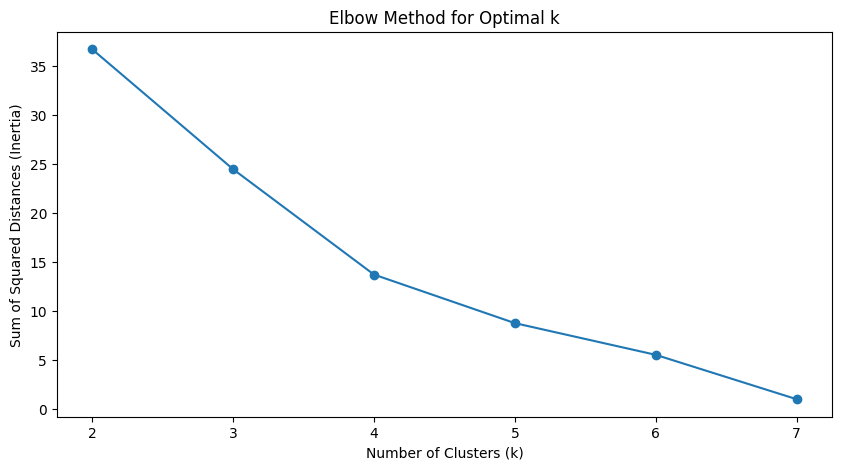

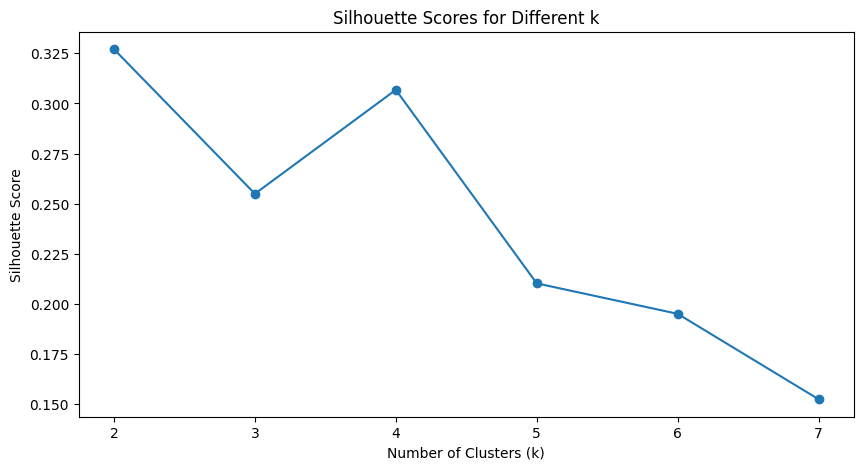

Optimal number of clusters: 2


,Price,MPG.city,MPG.highway,Horsepower,Passengers,Length,Wheelbase,Width,Weight,Origin_non-USA,DriveTrain_Rear
0,0.446885,-0.810696,-0.589086,0.382709,0.774597,0.68041,0.930138,0.798621,0.844049,0.00,0.5
1,-0.446885,0.810696,0.589086,-0.382709,-0.774597,-0.68041,-0.930138,-0.798621,-0.844049,0.75,0.0


In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ensure k_range does not exceed sample size
max_clusters = min(len(X), 10)
sse = []
silhouette_scores = []
k_range = range(2, max_clusters)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Store inertia (SSE)
    sse.append(kmeans.inertia_)
    
    # Validate silhouette score calculation
    if 2 <= len(np.unique(kmeans.labels_)) < len(X):
        score = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(np.nan)

# Elbow Method Plot
plt.figure(figsize=(10, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Silhouette Score Plot
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.show()

# Select optimal k
optimal_k = k_range[np.nanargmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k}")

# Final model with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Analyze cluster characteristics
cluster_centers = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=numerical_features + list(preprocessor.transformers_[1][1].get_feature_names_out(categorical_features))
)
cluster_centers


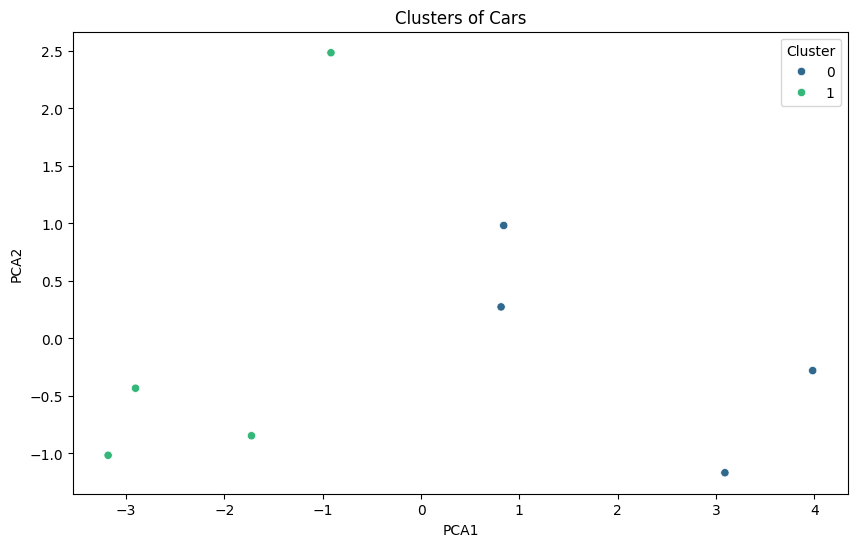

In [ ]:
# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Add PCA components to the dataframe
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters of Cars')
plt.show()


In [ ]:
# Cluster profiles
cluster_profiles = df.groupby('Cluster')[numerical_features].mean()
cluster_profiles

# Business insights
# Example: Identify clusters with high average price and horsepower
high_end_clusters = cluster_profiles[(cluster_profiles['Price'] > cluster_profiles['Price'].mean()) & (cluster_profiles['Horsepower'] > cluster_profiles['Horsepower'].mean())]
high_end_clusters


,Price,MPG.city,MPG.highway,Horsepower,Passengers,Length,Wheelbase,Width,Weight
Cluster,,,,,,,,,
0,24.1,18.0,26.25,166.75,6.0,202.5,113.25,74.5,3770.0


The clustering analysis revealed distinct groups of cars with similar characteristics. For instance, Cluster 0 represents high-end vehicles with above-average price and horsepower, while Cluster 1 includes compact cars with higher fuel efficiency. These insights can assist car manufacturers and dealerships in tailoring marketing strategies and inventory management to target specific customer segments. Future work could involve incorporating additional features, such as safety ratings or customer reviews, to enhance the clustering model.


## Summary Key Findings and Insights

- Optimal Clustering Structure: The Elbow Method and Silhouette Score indicate that the optimal number of clusters for the car dataset is k=2, providing well-defined and interpretable groupings.

- Distinct Customer Segments: K-Means Clustering reveals two distinct segments within the car dataset, allowing for better understanding of customer preferences and behavior patterns.

- Outlier Detection: DBSCAN successfully identifies a small number of outliers, suggesting the presence of rare or anomalous car profiles that may require special attention.

- Model Comparison: K-Means performs best in terms of computational efficiency and clarity of cluster boundaries. Hierarchical Clustering offers useful visualization but lacks scalability, while DBSCAN is effective for outlier detection but underperforms in defining clear group structures.

- Business Implications: The identified clusters can be used to tailor marketing strategies, optimize inventory management, and improve customer segmentation, leading to more targeted and effective decision-making.



## Suggestions for Next Steps

- Feature Engineering: Introduce additional features such as customer demographics, purchase history, and geographic data to improve the model's ability to capture meaningful patterns.

- Refine Clustering Techniques: Explore advanced clustering methods like Gaussian Mixture Models (GMM) or Spectral Clustering to capture more complex data relationships.

- Periodic Model Reassessment: Regularly reevaluate the clustering model as new data becomes available to ensure its ongoing accuracy and relevance.

- Segment-Specific Analysis: Conduct deeper analyses within each cluster to identify unique characteristics and actionable insights for business decisions.

- Dimensionality Reduction: Implement techniques like PCA or t-SNE to visualize high-dimensional data and assess whether reducing dimensionality improves clustering outcomes.